🔹 First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

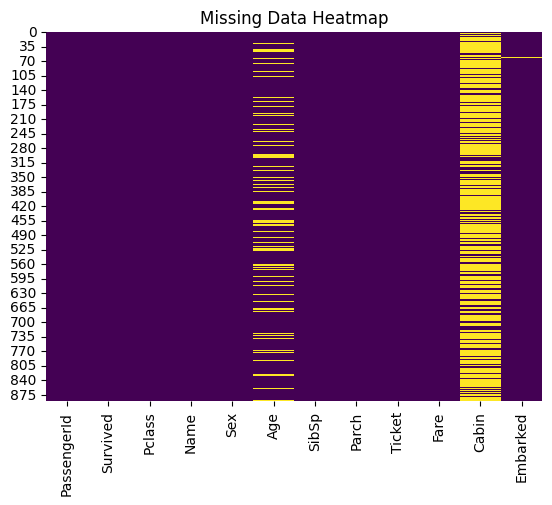


✅ Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

✅ Accuracy Score: 0.7988826815642458

📌 Final Transformed Features:
 ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

🎉 Task 1 Completed Successfully!
✅ Files Saved: cleaned_data.csv & pipeline_model.pkl


In [ ]:
# 🚀 CodTech Internship - Task 1: Advanced Data Preprocessing Pipeline
# 👤 Created by: Chandra Bhanu Dey

# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn import set_config

# 🖼 Display pipeline diagram
set_config(display='diagram')

# 📊 Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 🔍 Initial exploration
print("🔹 First 5 rows:\n", df.head())
print("\n🔹 Missing values:\n", df.isnull().sum())
print("\n🔹 Survived distribution:\n", df['Survived'].value_counts())

# 📊 Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# 🎯 Feature and target setup
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = df[features]
y = df[target]

# ✂ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙ Pipelines
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif, k='all'))  # Supervised needs y
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 🧱 Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 🧪 Full pipeline with Logistic Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 🏁 Fit model
model_pipeline.fit(X_train, y_train)

# 📈 Evaluate
y_pred = model_pipeline.predict(X_test)
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# 📌 Transformed feature names
encoder = model_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
encoded_columns = encoder.get_feature_names_out(categorical_features)
final_feature_names = numeric_features + list(encoded_columns)
print("\n📌 Final Transformed Features:\n", final_feature_names)

# 💾 Save cleaned data (✅ FIXED with y passed)
X_cleaned = model_pipeline.named_steps['preprocessor'].fit_transform(X, y)
pd.DataFrame(X_cleaned).to_csv("cleaned_data.csv", index=False)

# 💾 Save pipeline model
joblib.dump(model_pipeline, "pipeline_model.pkl")

print("\n🎉 Task 1 Completed Successfully!")
print("✅ Files Saved: cleaned_data.csv & pipeline_model.pkl")